In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import pickle
from flask import Flask


In [2]:
data = pd.read_csv("Datasets/combined_dataset.csv", index_col=0)

In [3]:
data.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,3,0,4,32,149,1,1,0,0,3,2.0,0
1,5008805,1,1,1,0,427500.0,4,3,0,4,32,149,1,1,0,0,3,2.0,0
2,5008806,1,1,1,0,112500.0,4,2,0,1,58,37,1,0,0,0,2,2.0,0
3,5008808,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0,0
4,5008809,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0,0
5,5008810,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0,0
6,5008811,0,0,1,0,270000.0,0,2,2,1,52,100,1,0,1,1,5,1.0,0
7,5008812,0,0,1,0,283500.0,1,3,1,1,61,0,1,0,0,0,3,1.0,0
8,5008813,0,0,1,0,283500.0,1,3,1,1,61,0,1,0,0,0,3,1.0,0
9,5008814,0,0,1,0,283500.0,1,3,1,1,61,0,1,0,0,0,3,1.0,0


In [4]:
data['STATUS'].value_counts()
# Detected sampling issue

0    35300
1      602
Name: STATUS, dtype: int64

In [5]:
# Select the data
X = data.drop(columns = {"STATUS", "ID", 'FLAG_MOBIL', 'FLAG_WORK_PHONE'})
y = data["STATUS"]

In [6]:
X.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'MONTHS_EMPLOYED',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [7]:
# Training the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)

In [8]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [29]:
pd.DataFrame({'A':'1', 'B': '4'})

ValueError: If using all scalar values, you must pass an index

In [23]:
import pickle
pickle.dump(mms, open('model/scalar.pkl', 'wb'))

# And now to load...

# scaler = pickle.load(open(f'model/scalar.pkl', 'rb')) 

with open(f'model/scalar.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [38]:
results = {'CODE_GENDER': '0', 'FLAG_OWN_CAR': '1', 'FLAG_OWN_REALTY': '1', 'CNT_CHILDREN': '5', 'AMT_INCOME_TOTAL': '10000', 'NAME_INCOME_TYPE': '2', 'NAME_EDUCATION_TYPE': '1', 'NAME_FAMILY_STATUS': '1', 'NAME_HOUSING_TYPE': '2', 'AGE': '18', 'MONTHS_EMPLOYED': '5', 'FLAG_PHONE': '1', 'FLAG_EMAIL': '1', 'OCCUPATION_TYPE': '2', 'CNT_FAM_MEMBERS': '5'}
for key, value in results.items():
    try:
        results[key] = [int(value)]
    except ValueError:
        results[key] = float(value) # use here str(value)
results = pd.DataFrame(results)
results.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,1,1,5,10000,2,1,1,2,18,5,1,1,2,5


In [24]:
scaler.transform(X_test)

array([[1.        , 0.        , 1.        , ..., 0.        , 0.4       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.33333333],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.6       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.6       ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.4       ,
        1.        ]])

In [12]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,MONTHS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,3,0,4,32,149,0,0,3,2.0
1,1,1,1,0,427500.0,4,3,0,4,32,149,0,0,3,2.0
2,1,1,1,0,112500.0,4,2,0,1,58,37,0,0,2,2.0
3,0,0,1,0,270000.0,0,2,2,1,52,100,1,1,5,1.0
4,0,0,1,0,270000.0,0,2,2,1,52,100,1,1,5,1.0


In [14]:
X_train.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'MONTHS_EMPLOYED',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [15]:
X.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'MONTHS_EMPLOYED',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [16]:
X.values[0]

array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 4.275e+05, 4.000e+00,
       3.000e+00, 0.000e+00, 4.000e+00, 3.200e+01, 1.490e+02, 0.000e+00,
       0.000e+00, 3.000e+00, 2.000e+00])

In [19]:
a_list = mms.transform(X.head(1))

In [ ]:
X_test.shape()

In [20]:
a_list

array([[1.        , 1.        , 1.        , 0.        , 0.43012884,
        1.        , 1.        , 0.        , 0.8       , 0.25      ,
        0.28875969, 0.        , 0.        , 0.6       , 0.33333333]])

In [9]:
# Adressing over-sampling by using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [10]:
y_train.value_counts()

0    26458
1      468
Name: STATUS, dtype: int64

In [11]:
y_balanced.value_counts()

0    26458
1    26458
Name: STATUS, dtype: int64

In [12]:
y_test.value_counts()

0    8842
1     134
Name: STATUS, dtype: int64

In [13]:
y_test_balanced.value_counts()

0    8842
1    8842
Name: STATUS, dtype: int64

### Applying Machine Learning Models

Note:
- X_train is now X_balanced
- X_test is now X_test_scaled
- y_train is now y_balanced

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/ishaannigam/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/ishaannigam/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Logistic Regression

In [16]:
classifier = LogisticRegression()
classifier.fit(X_balanced, y_balanced)

LogisticRegression()

In [17]:
print(f"Training Data Score: {classifier.score(X_balanced, y_balanced)}")
print(f"Testing Data Score: {classifier.score(X_test_balanced, y_test_balanced)}")

Training Data Score: 0.5833963262529291
Testing Data Score: 0.5287830807509614


[[0.53935761 0.46064239]
 [0.48179145 0.51820855]]


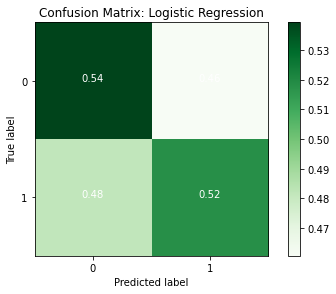

In [18]:
predictions = classifier.predict(X_test_balanced)
plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes=['0','1'], normalize = True, 
                      title='Confusion Matrix: Logistic Regression')

Decision Tree Classifier

In [22]:
classifier = DecisionTreeClassifier()
classifier.fit(X_balanced, y_balanced)


DecisionTreeClassifier()

In [23]:
print(f"Training Data Score: {classifier.score(X_balanced, y_balanced)}")
print(f"Testing Data Score: {classifier.score(X_test_balanced, y_test_balanced)}")

Training Data Score: 0.9937825988358908
Testing Data Score: 0.8799479755711378


[[0.98789867 0.01210133]
 [0.22800271 0.77199729]]


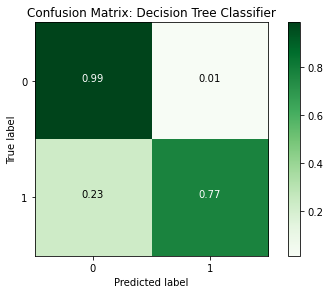

In [24]:
predictions = classifier.predict(X_test_balanced)
plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes=['0','1'], normalize = True, 
                      title='Confusion Matrix: Decision Tree Classifier')

In [26]:
# View Importance of features
sorted(zip(classifier.feature_importances_, X_balanced.columns), reverse=True)


[(0.16085531426719346, 'NAME_EDUCATION_TYPE'),
 (0.12825849849692447, 'AMT_INCOME_TOTAL'),
 (0.12254119524681177, 'AGE'),
 (0.11454785642947646, 'OCCUPATION_TYPE'),
 (0.10260717616089868, 'MONTHS_EMPLOYED'),
 (0.07018264840749837, 'CNT_CHILDREN'),
 (0.06428803905740339, 'NAME_INCOME_TYPE'),
 (0.049954823880754, 'NAME_FAMILY_STATUS'),
 (0.04668232806575993, 'CNT_FAM_MEMBERS'),
 (0.03563333310520799, 'FLAG_OWN_CAR'),
 (0.026642482545060873, 'FLAG_OWN_REALTY'),
 (0.02603287158693886, 'NAME_HOUSING_TYPE'),
 (0.022714064410001747, 'FLAG_PHONE'),
 (0.01563334501941586, 'CODE_GENDER'),
 (0.013426023320654004, 'FLAG_EMAIL')]

Random Forest 

In [27]:
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_balanced, y_balanced)

RandomForestClassifier(n_estimators=200)

In [28]:
print(f"Training Data Score: {classifier.score(X_balanced, y_balanced)}")
print(f"Testing Data Score: {classifier.score(X_test_balanced, y_test_balanced)}")

Training Data Score: 0.9937825988358908
Testing Data Score: 0.8737842117168062


In [29]:
# View Importance of features
sorted(zip(classifier.feature_importances_, X_balanced.columns), reverse=True)

[(0.14379370521699886, 'AMT_INCOME_TOTAL'),
 (0.14101920171879603, 'AGE'),
 (0.10806021456560296, 'OCCUPATION_TYPE'),
 (0.10557569163642762, 'NAME_EDUCATION_TYPE'),
 (0.09808552453154608, 'MONTHS_EMPLOYED'),
 (0.06822434084249888, 'CNT_FAM_MEMBERS'),
 (0.06551821915211897, 'NAME_INCOME_TYPE'),
 (0.059509464392954826, 'CNT_CHILDREN'),
 (0.04545336172617119, 'NAME_FAMILY_STATUS'),
 (0.03324189774713158, 'FLAG_OWN_CAR'),
 (0.03114355988891303, 'FLAG_PHONE'),
 (0.02969806347922391, 'FLAG_OWN_REALTY'),
 (0.027578627055980964, 'NAME_HOUSING_TYPE'),
 (0.026260484596530426, 'CODE_GENDER'),
 (0.016837643449104888, 'FLAG_EMAIL')]

[[0.99083918 0.00916082]
 [0.24327075 0.75672925]]


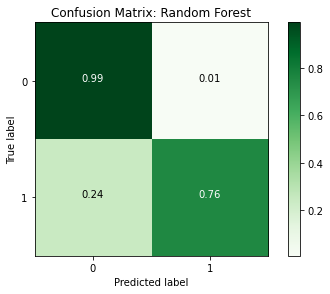

In [30]:
predictions = classifier.predict(X_test_balanced)
plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes=['0','1'], normalize = True, 
                      title='Confusion Matrix: Random Forest')

SVC (Support Vector Machine)

In [39]:
classifier = SVC(C = 0.8, kernel='linear')
classifier.fit(X_balanced, y_balanced)

SVC(C=0.8, kernel='linear')

In [40]:
print(f"Training Data Score: {classifier.score(X_balanced, y_balanced)}")
print(f"Testing Data Score: {classifier.score(X_test_balanced, y_test_balanced)}")

Training Data Score: 0.5928074684405473
Testing Data Score: 0.5301402397647591


[[0.47794617 0.52205383]
 [0.41766569 0.58233431]]


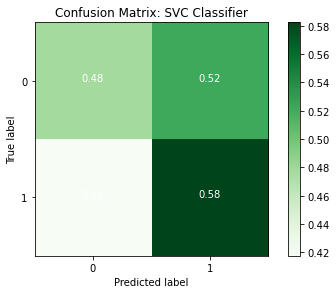

In [41]:
predictions = classifier.predict(X_test_balanced)
plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes=['0','1'], normalize = True, 
                      title='Confusion Matrix: SVC Classifier')

KNeighbors 

In [43]:
for k in range(1, 10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    test_score = classifier.score(X_test_balanced, y_test_balanced)

    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    print("-"*12)

k: 1, Train/Test Score: 0.974/0.710
------------
k: 3, Train/Test Score: 0.968/0.712
------------
k: 5, Train/Test Score: 0.959/0.706
------------
k: 7, Train/Test Score: 0.954/0.704
------------
k: 9, Train/Test Score: 0.945/0.705
------------


[[0.93270753 0.06729247]
 [0.52216693 0.47783307]]


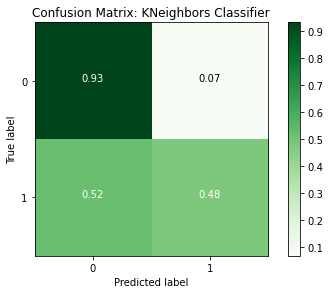

In [44]:
predictions = classifier.predict(X_test_balanced)
plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes=['0','1'], normalize = True, 
                      title='Confusion Matrix: KNeighbors Classifier')

XGBoost

In [31]:
classifier = XGBClassifier(max_depth = 12,
                      n_estimators = 250,
                      min_child_weight = 8, 
                      subsample = 0.8 
)
classifier.fit(X_balanced, y_balanced)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=12, min_child_weight=8, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(f"Training Data Score: {classifier.score(X_balanced, y_balanced)}")
print(f"Testing Data Score: {classifier.score(X_test_balanced, y_test_balanced)}")

Training Data Score: 0.9934424370700733
Testing Data Score: 0.9543655281610496


[[0.99208324 0.00791676]
 [0.08335218 0.91664782]]


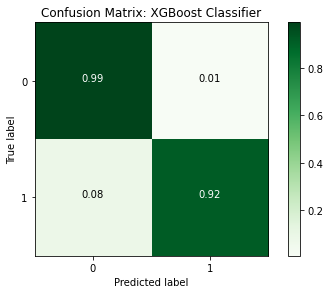

In [33]:
predictions = classifier.predict(X_test_balanced)
plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes=['0','1'], normalize = True, 
                      title='Confusion Matrix: XGBoost Classifier')

In [34]:
# View Importance of features
sorted(zip(classifier.feature_importances_, X_balanced.columns), reverse=True)


[(0.17191708, 'NAME_EDUCATION_TYPE'),
 (0.15967217, 'CNT_CHILDREN'),
 (0.10163782, 'FLAG_EMAIL'),
 (0.10148271, 'OCCUPATION_TYPE'),
 (0.08045992, 'NAME_HOUSING_TYPE'),
 (0.070120186, 'CNT_FAM_MEMBERS'),
 (0.05781027, 'NAME_FAMILY_STATUS'),
 (0.056193642, 'NAME_INCOME_TYPE'),
 (0.034908656, 'CODE_GENDER'),
 (0.032862242, 'FLAG_OWN_CAR'),
 (0.030690836, 'FLAG_PHONE'),
 (0.02954289, 'AMT_INCOME_TOTAL'),
 (0.027402788, 'FLAG_OWN_REALTY'),
 (0.023171201, 'MONTHS_EMPLOYED'),
 (0.02212758, 'AGE')]

LightGBM

In [35]:
classifier = LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
)
classifier.fit(X_balanced, y_balanced)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=8,
               n_estimators=250, subsample=0.8)

In [36]:
print(f"Training Data Score: {classifier.score(X_balanced, y_balanced)}")
print(f"Testing Data Score: {classifier.score(X_test_balanced, y_test_balanced)}")

Training Data Score: 0.9565915791065084
Testing Data Score: 0.9312938249264873


[[0.96324361 0.03675639]
 [0.10065596 0.89934404]]


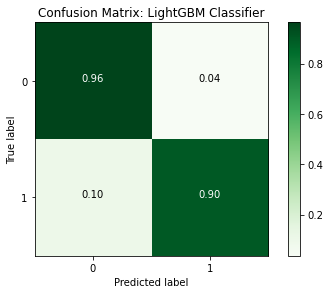

In [37]:
predictions = classifier.predict(X_test_balanced)
plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes=['0','1'], normalize = True, 
                      title='Confusion Matrix: LightGBM Classifier')

In [38]:
# View Importance of features
sorted(zip(classifier.feature_importances_, X_balanced.columns), reverse=True)


[(1352, 'AMT_INCOME_TOTAL'),
 (1081, 'AGE'),
 (859, 'OCCUPATION_TYPE'),
 (693, 'MONTHS_EMPLOYED'),
 (568, 'NAME_EDUCATION_TYPE'),
 (444, 'CNT_CHILDREN'),
 (440, 'NAME_INCOME_TYPE'),
 (400, 'CNT_FAM_MEMBERS'),
 (361, 'NAME_FAMILY_STATUS'),
 (289, 'NAME_HOUSING_TYPE'),
 (229, 'FLAG_OWN_CAR'),
 (221, 'FLAG_PHONE'),
 (211, 'CODE_GENDER'),
 (195, 'FLAG_OWN_REALTY'),
 (157, 'FLAG_EMAIL')]

CatBoost

In [46]:
classifier = CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42
)
classifier.fit(X_balanced, y_balanced)

0:	learn: 0.5092551	total: 5.28s	remaining: 21m 54s
25:	learn: 0.0703332	total: 1m 52s	remaining: 16m 11s
50:	learn: 0.0402062	total: 3m 36s	remaining: 14m 5s
75:	learn: 0.0302036	total: 5m 25s	remaining: 12m 25s
100:	learn: 0.0258129	total: 7m 21s	remaining: 10m 51s
125:	learn: 0.0235541	total: 9m 27s	remaining: 9m 18s
150:	learn: 0.0221434	total: 11m 7s	remaining: 7m 17s
175:	learn: 0.0212382	total: 12m 47s	remaining: 5m 22s
200:	learn: 0.0208957	total: 14m 19s	remaining: 3m 29s
225:	learn: 0.0205867	total: 15m 48s	remaining: 1m 40s
249:	learn: 0.0204094	total: 17m 4s	remaining: 0us


In [47]:
print(f"Training Data Score: {classifier.score(X_balanced, y_balanced)}")
print(f"Testing Data Score: {classifier.score(X_test_balanced, y_test_balanced)}")

Training Data Score: 0.9937825988358908
Testing Data Score: 0.8689776068762723


[[0.99072608 0.00927392]
 [0.25277087 0.74722913]]


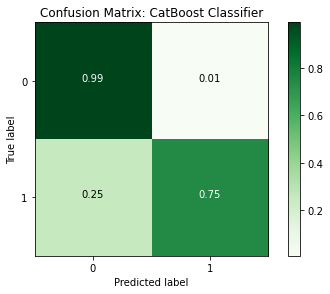

In [48]:
predictions = classifier.predict(X_test_balanced)
plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes=['0','1'], normalize = True, 
                      title='Confusion Matrix: CatBoost Classifier')

In [49]:
# View Importance of features
sorted(zip(classifier.feature_importances_, X_balanced.columns), reverse=True)


[(12.54803773258425, 'AMT_INCOME_TOTAL'),
 (10.486709348915303, 'AGE'),
 (10.021613117490645, 'OCCUPATION_TYPE'),
 (9.848746070723221, 'NAME_EDUCATION_TYPE'),
 (7.377392363310195, 'FLAG_OWN_REALTY'),
 (7.327921944924612, 'MONTHS_EMPLOYED'),
 (6.770235382884584, 'FLAG_OWN_CAR'),
 (6.726899733958183, 'FLAG_PHONE'),
 (6.563011839440222, 'NAME_INCOME_TYPE'),
 (6.524512791458688, 'CNT_FAM_MEMBERS'),
 (4.940535566325715, 'CODE_GENDER'),
 (4.3936576566455, 'CNT_CHILDREN'),
 (4.209248744568873, 'NAME_FAMILY_STATUS'),
 (1.498890662902257, 'NAME_HOUSING_TYPE'),
 (0.7625870438677527, 'FLAG_EMAIL')]

### Save LGBMClassifier model

- LGBMClassifier was used as it has a 90% chance of predicting 1 (Defaulter)
- Although XGBoost is higher at 92%, the weighting of the features were not justifiable

In [50]:
classifier = LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
)
classifier.fit(X_balanced, y_balanced)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=8,
               n_estimators=250, subsample=0.8)

In [51]:
print(f"Training Data Score: {classifier.score(X_balanced, y_balanced)}")
print(f"Testing Data Score: {classifier.score(X_test_balanced, y_test_balanced)}")

Training Data Score: 0.9565915791065084
Testing Data Score: 0.9312938249264873


In [53]:
pickle.dump(classifier, open('model/model.pkl','wb'))